In [ ]:
from matplotlib import image
import matplotlib.pyplot as plt
import numpy as np
import cv2
import pandas as pd
import csv
import os
pd.__version__
from PIL import Image

# Segmentacion RGB

<function matplotlib.pyplot.show(close=None, block=None)>

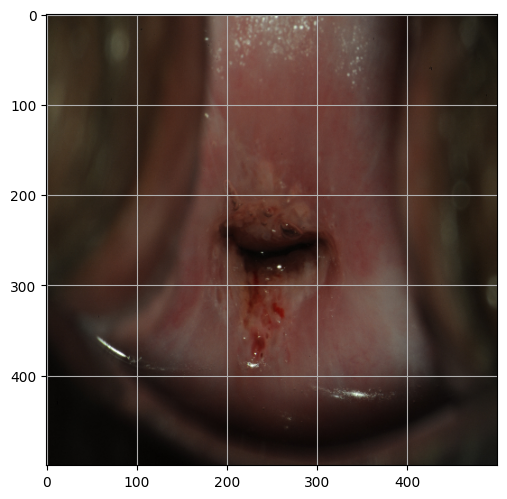

In [ ]:
imagen = cv2.imread('/content/I110935.jpg')
imagen_rgb = cv2.cvtColor(imagen,cv2.COLOR_BGR2RGB)
imagen_rgb = cv2.resize(imagen_rgb, (500,500))

plt.figure(figsize=(12.8,9.6))
plt.subplot(121)
plt.imshow(imagen_rgb)
plt.grid('on')

plt.show

Extracción de la región de interés

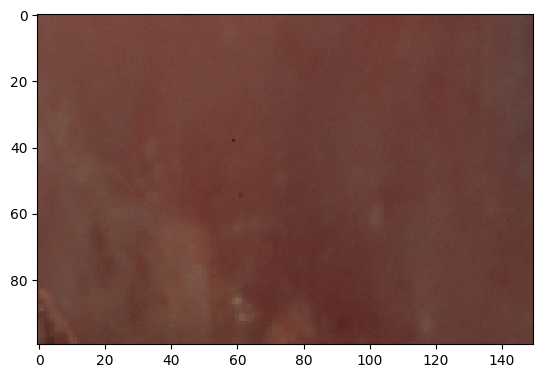

In [ ]:
#rect = (500,0,3000,3000)
region = imagen_rgb[100:200,200:350,:]

plt.imshow(region)
plt.show()

Rangos de color

rojo  68 128
verde  37 98
azul  29 77


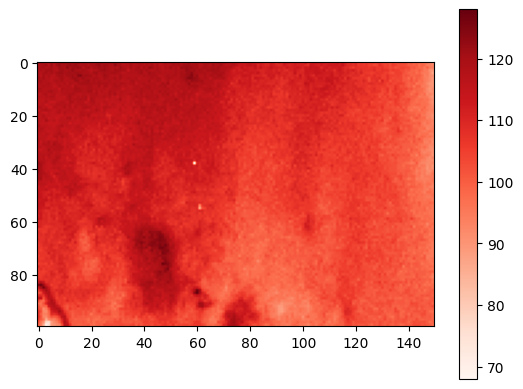

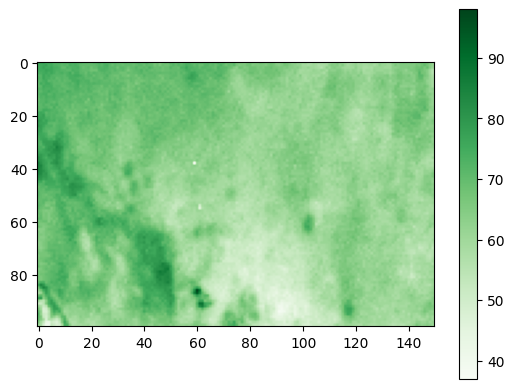

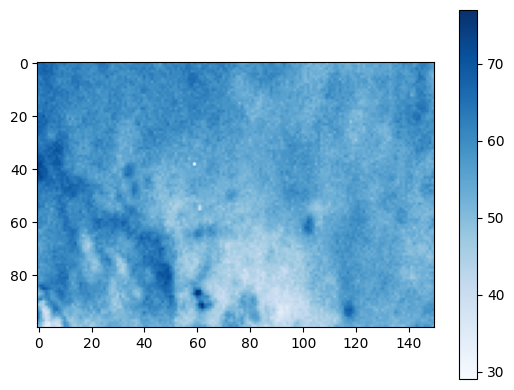

In [ ]:
rmin, rmax = np.min(region[:,:,0].ravel()),np.max(region[:,:,0].ravel())
gmin, gmax = np.min(region[:,:,1].ravel()),np.max(region[:,:,1].ravel())
bmin, bmax = np.min(region[:,:,2].ravel()),np.max(region[:,:,2].ravel())

print('rojo ' , rmin, rmax)
print('verde ', gmin, gmax)
print('azul ' , bmin, bmax)

rmin, rmax = (rmin), (rmax)
gmin, gmax = (gmin), (gmax)
bmin, bmax = (bmin), (bmax)

plt.imshow(region[:,:,0],'Reds')
plt.colorbar()
plt.show()


plt.imshow(region[:,:,1],'Greens')
plt.colorbar()
plt.show()

plt.imshow(region[:,:,2],'Blues')
plt.colorbar()
plt.show()


[128  98  77]
[68 37 29]


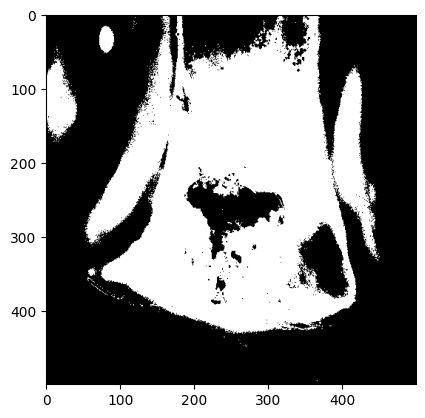

In [ ]:
umbral_bajo = np.array([rmin, gmin, bmin])
umbral_alto = np.array([rmax, gmax, bmax])
print(umbral_alto)
print(umbral_bajo)

umbral = cv2.inRange(imagen_rgb,umbral_bajo,umbral_alto)

plt.imshow(umbral,'gray')
plt.show()

Filtro morfológico, para eliminar objetos no deseados

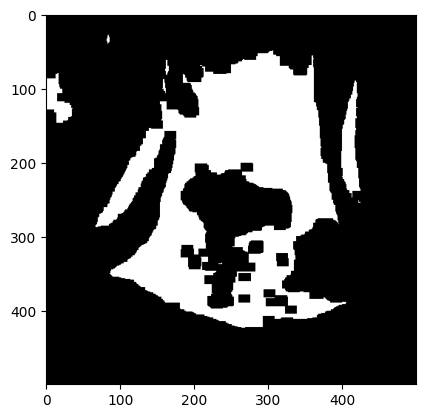

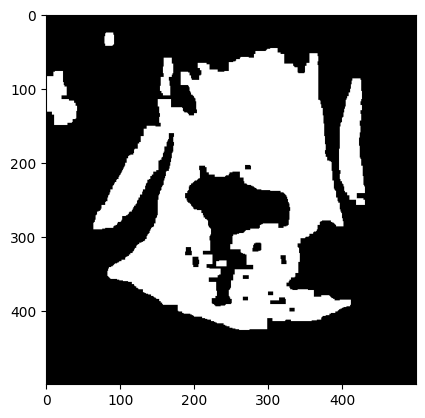

In [ ]:
kernel = np.ones((3,4),dtype='uint8') #devuelve matriz llena de unos 3*3
erosion = cv2.erode(umbral,kernel,iterations = 5)#se usa para hacer erosiones en imagenes
dilata = cv2.dilate(erosion,kernel,iterations = 3)

plt.imshow(erosion,'gray')
plt.show()

plt.imshow(dilata,'gray')
plt.show()



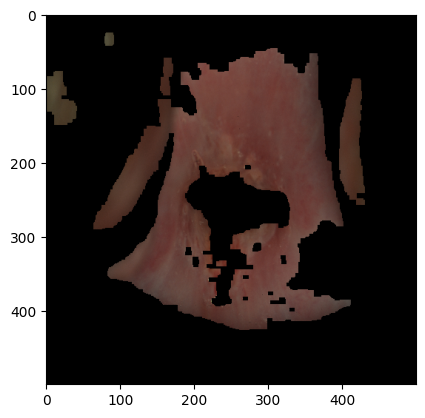

In [ ]:
mascara_rgb = imagen_rgb.copy()

for i in range (3):
  mascara_rgb[:,:,i] = cv2.bitwise_and(mascara_rgb[:,:,i],dilata)

plt.imshow(mascara_rgb)
plt.show()

# Nueva sección

In [ ]:
def RGB(ruta_img):
  imagen = cv2.imread(ruta_img)
  imagen_rgb = cv2.cvtColor(imagen,cv2.COLOR_BGR2RGB)
  imagen_rgb = cv2.resize(imagen_rgb, (500,500))

  region = imagen_rgb[100:300,150:300,:]
  rmin, rmax = np.min(region[:,:,0].ravel()),np.max(region[:,:,0].ravel())
  gmin, gmax = np.min(region[:,:,1].ravel()),np.max(region[:,:,1].ravel())
  bmin, bmax = np.min(region[:,:,2].ravel()),np.max(region[:,:,2].ravel())

  umbral_bajo = np.array([rmin, gmin, bmin])
  umbral_alto = np.array([rmax, gmax, bmax])

  umbral = cv2.inRange(imagen_rgb,umbral_bajo,umbral_alto)
  segmented = umbral.astype(bool)

  return segmented

In [ ]:
def guardar(imagenbn, nombreArchivo):
  # Convertir la máscara a objeto de imagen
  mask_image = Image.fromarray(imagenbn)

  # Guardar la máscara
  ruta = '/content/drive/MyDrive/PROYECTO_GRADO/RGB/' + nombreArchivo
  mask_image.save(ruta)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ruta = "/content/drive/MyDrive/Training_SM/Training_Unet/Imagenes"
lista_archivos = os.listdir(ruta)
len(lista_archivos)

1050

In [ ]:
ruta_faltante = "/content/drive/MyDrive/PROYECTO_GRADO/RGB"
lista_faltante = os.listdir(ruta_faltante)
len(lista_faltante)

1050

In [ ]:
for i in range (len(lista_archivos)):
  Archivo = lista_archivos[i]
  #Ruta de imagen
  rutaImg = '/content/drive/MyDrive/Training_SM/Training_Unet/Imagenes/' + Archivo
  Mascara_MG = RGB(rutaImg)
  guardar(Mascara_MG, Archivo)